In [1]:
import cv2
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
image_path=r"C:\Users\mandl\Downloads\test\TomatoYellowCurlVirus1.JPG"

In [4]:
img=cv2.imread(image_path)

In [6]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

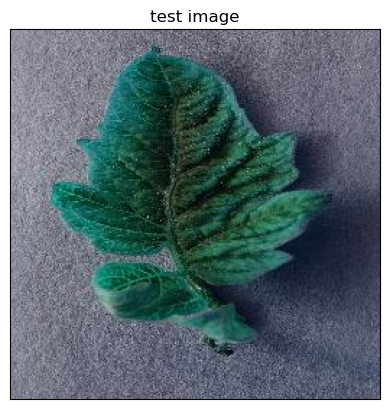

In [9]:
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array(input_arr)
print(input_arr.shape)

(128, 128, 3)


In [11]:
input_arr = np.expand_dims(input_arr, axis=1) 

In [12]:
input_arr = input_arr.reshape(-1, 128, 128, 3) 

In [13]:
cnn = tf.keras.models.Sequential()

# Convolutional Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 3
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout and Fully Connected Layer
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))  # Adjusted for 6 classes

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\mandl\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      12,289,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           9,006 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,010,730 (64.89 MB)

 Trainable params: 17,010,730 (64.89 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mandl\Downloads\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2527 files belonging to 6 classes.


In [17]:
train_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\mandl\Downloads\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = valid_set.class_names
print(class_name)

Found 10769 files belonging to 6 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew']


In [18]:
from PIL import Image
import os

def remove_corrupted_images(directory):
    num_corrupted = 0
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify that it is a valid image
            except (IOError, SyntaxError) as e:
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)  # Remove the corrupted file
                num_corrupted += 1
    return num_corrupted

# Check and remove corrupted images from both train and validation directories
num_train_corrupted = remove_corrupted_images(r"C:\Users\mandl\Downloads\train")
num_valid_corrupted = remove_corrupted_images(r"C:\Users\mandl\Downloads\valid")

print(f"Removed {num_train_corrupted} corrupted images from training set.")
print(f"Removed {num_valid_corrupted} corrupted images from validation set.")

Removed 0 corrupted images from training set.
Removed 0 corrupted images from validation set.


In [19]:
import os

def check_missing_files(directory):
    missing_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            if not os.path.exists(file_path):
                missing_files.append(file_path)
    return missing_files

# Check for missing files in the validation directory
missing_files = check_missing_files(r"C:\Users\mandl\Downloads\valid")
if missing_files:
    print(f"Missing files: {missing_files}")
else:
    print("No missing files.")

No missing files.


In [ ]:
training_history = cnn.fit(x=train_set,validation_data=valid_set,epochs=100)

203/337 ━━━━━━━━━━━━━━━━━━━━ 3:24 2s/step - accuracy: 0.3444 - loss: 1.7294

In [19]:
train_loss, train_acc = cnn.evaluate(train_set)
print('Training accuracy:', train_acc)

337/337 ━━━━━━━━━━━━━━━━━━━━ 167s 494ms/step - accuracy: 0.9322 - loss: 0.1890
Training accuracy: 0.9344414472579956


In [20]:
val_loss, val_acc = cnn.evaluate(valid_set)
print('Validation accuracy:', val_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 490ms/step - accuracy: 0.9283 - loss: 0.2095
Validation accuracy: 0.9252077341079712


In [21]:
cnn.save('trained_plant_disease_model.keras')


In [22]:
prediction=cnn.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


(array([[0.00091997, 0.10181317, 0.08103824, 0.04611361, 0.4435202 ,
         0.32659474]], dtype=float32),
 (1, 6))

In [23]:
result_index=np.argmax(prediction)

In [24]:
result_index

4

In [25]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew']

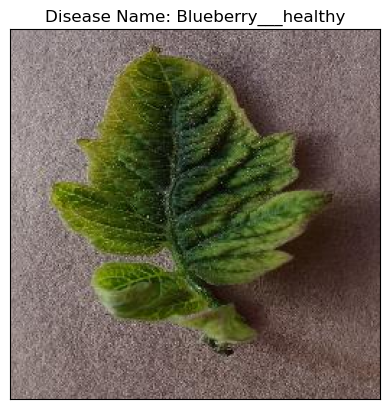

In [31]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [32]:
model_prediction

'Blueberry___healthy'